In [176]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
y, sr = librosa.load("../raw_data/056247.mp3")
len(y)

/Users/judithvanleersum/.pyenv/versions/3.8.6/envs/ai_dj/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


660984

In [146]:
z = librosa.zero_crossings(y)
z

array([ True, False, False, ..., False, False,  True])

In [147]:
z_stack = librosa.util.stack([y, z], axis=-1)
z_stack

array([[-0.02722292,  1.        ],
       [-0.03561183,  0.        ],
       [-0.03010173,  0.        ],
       ...,
       [-0.03114805,  0.        ],
       [-0.00685424,  0.        ],
       [ 0.        ,  1.        ]], dtype=float32)

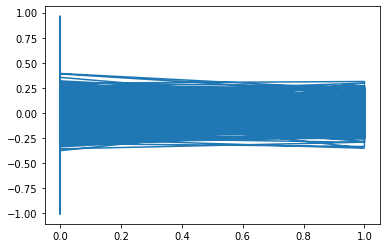

In [152]:
plt.plot(z_stack[:,1], z_stack[:,0])
# plt.xlim(0, 1000)

In [25]:
non_zero = np.nonzero(z)
non_zero

(array([     0,    217,    405, ..., 660954, 660969, 660983]),)

In [52]:
non_zero = pd.Series(non_zero)
non_zero[0]

array([     0,    217,    405, ..., 660954, 660969, 660983])

In [57]:
zero_cross_df = pd.DataFrame()
zero_cross_df["zero_crossing"] = non_zero[0]

In [62]:
zero_cross_df["difference"] = zero_cross_df["zero_crossing"].diff()

In [63]:
zero_cross_df

,zero_crossing,difference
0,0,NaN
1,217,217.0
2,405,188.0
3,595,190.0
4,785,190.0
...,...,...
31045,660901,8.0
31046,660920,19.0
31047,660954,34.0
31048,660969,15.0


Text(0.5, 1.0, 'Zero-crossing intervals - Original')

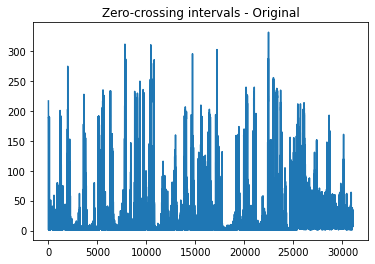

In [67]:
plt.plot(zero_cross_df["difference"])
plt.title("Zero-crossing intervals - Original")

In [69]:
def zero_cross_intervals(file):
    y, sr = librosa.load(file)
    file_name = file.replace("../raw_data/", "")
    z = librosa.zero_crossings(y)
    z_stack = librosa.util.stack([y, z], axis=-1)
    non_zero = np.nonzero(z)
    non_zero = pd.Series(non_zero)
    df = pd.DataFrame()
    df["zero_crossing"] = non_zero[0]
    df["difference"] = df["zero_crossing"].diff()
    plt.plot(df["difference"])
    plt.title(f"Zero-crossing intervals - {file_name}")
    plt.show()
    return df

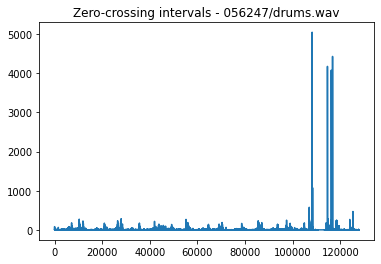

,zero_crossing,difference
0,0,NaN
1,12,12.0
2,13,1.0
3,15,2.0
4,16,1.0
...,...,...
127799,660970,1.0
127800,660973,3.0
127801,660977,4.0
127802,660979,2.0


In [70]:
zero_cross_intervals("../raw_data/056247/drums.wav")

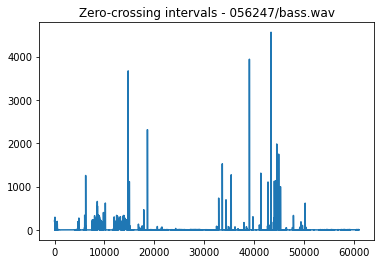

,zero_crossing,difference
0,0,NaN
1,217,217.0
2,405,188.0
3,594,189.0
4,785,191.0
...,...,...
60965,660967,4.0
60966,660970,3.0
60967,660974,4.0
60968,660977,3.0


In [71]:
zero_cross_intervals("../raw_data/056247/bass.wav")

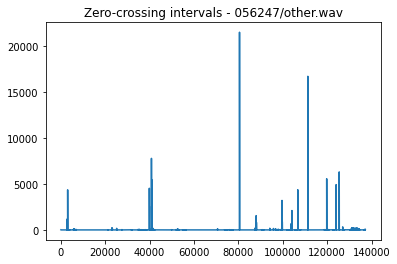

,zero_crossing,difference
0,0,NaN
1,10,10.0
2,17,7.0
3,18,1.0
4,19,1.0
...,...,...
137185,660882,17.0
137186,660918,36.0
137187,660956,38.0
137188,660975,19.0


In [72]:
zero_cross_intervals("../raw_data/056247/other.wav")

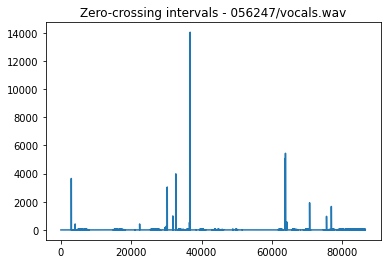

,zero_crossing,difference
0,0,NaN
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
86547,660902,10.0
86548,660921,19.0
86549,660954,33.0
86550,660968,14.0


In [73]:
zero_cross_intervals("../raw_data/056247/vocals.wav")

In [143]:
stems = ["bass", "drums", "other", "vocals"]

def mix_zero_cross_intervals(file, stems):
    original = f'{file}.wav'
    total_files = [original]
    for stem in stems:
        total_files.append(f'{file}/{stem}.wav')
    fig, axes = plt.subplots(5,1, figsize=(17.7, 14.6))
    for ax, audio in zip(axes.flatten(), total_files):
        y, sr = librosa.load(f'../raw_data/{audio}')
        z = librosa.zero_crossings(y)
        z_stack = librosa.util.stack([y, z], axis=-1)
        non_zero = pd.Series(np.nonzero(z))
#         non_zero = pd.Series(non_zero)
        df = pd.DataFrame()
        df[f"zero_crossing - {audio}"] = non_zero[0]
        print(audio, len(df))
        df[f"difference - {audio}"] = df[f"zero_crossing - {audio}"].diff()
        ax.plot(df[f"difference - {audio}"])
        ax.set_title(f"Zero-crossing intervals - {audio}")
        ax.set_xlim(0, 660984)
    plt.show()

056247.wav 31050
056247/bass.wav 60970
056247/drums.wav 127804
056247/other.wav 137190
056247/vocals.wav 86552


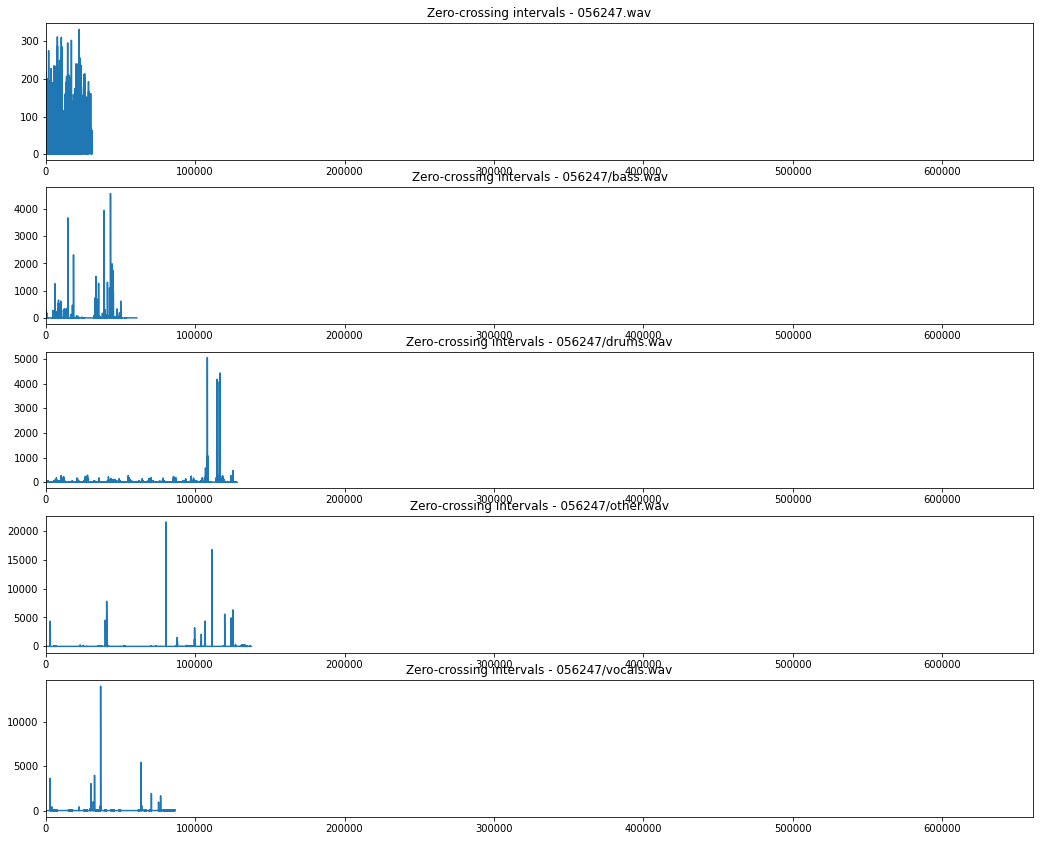

In [144]:
mix_zero_cross_intervals("056247", stems)

In [161]:
path = "../raw_data/056247/vocals.wav" 
raw = wave.open(path)

# reads all the frames 
# -1 indicates all or max frames
signal = raw.readframes(-1)
vocal_signal = np.frombuffer(signal, dtype ="int16")

# gets the frame rate
f_rate = raw.getframerate()

time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
vocal_signal

array([  -3,   -3,   -1, ..., 1452, -575, 1611], dtype=int16)

In [162]:
path = "../raw_data/056247/drums.wav" 
raw = wave.open(path)

# reads all the frames 
# -1 indicates all or max frames
signal = raw.readframes(-1)
drums_signal = np.frombuffer(signal, dtype ="int16")

# gets the frame rate
f_rate = raw.getframerate()

time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
drums_signal

array([-544, -363, -731, ...,  852, -183,  549], dtype=int16)

In [168]:
df = pd.DataFrame()

In [169]:
df["vocals"] = vocal_signal

In [170]:
df["drums"] = drums_signal

In [171]:
df["vocal_drums"] = df["vocals"]+df["drums"]

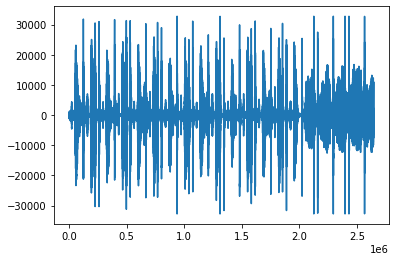

In [175]:
plt.plot(df["vocal_drums"])